In [2]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score,cross_val_predict
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [3]:
data=pd.read_csv('data_banknote_authentication.csv',header=None)

In [4]:
data.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
data.describe()

,0,1,2,3,4
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


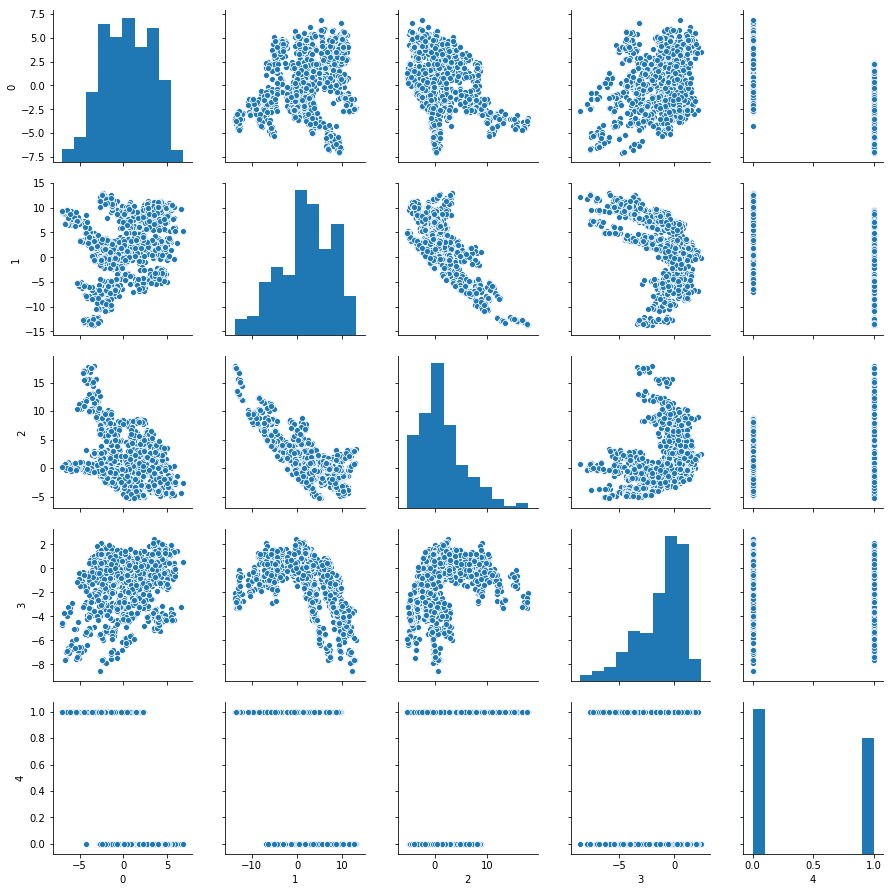

In [6]:
sns.pairplot(data=data)

In [7]:
data.shape

(1372, 5)

In [8]:
x = data.iloc[:,:4]

In [9]:
x

,0,1,2,3
0,3.621600,8.66610,-2.807300,-0.446990
1,4.545900,8.16740,-2.458600,-1.462100
2,3.866000,-2.63830,1.924200,0.106450
3,3.456600,9.52280,-4.011200,-3.594400
4,0.329240,-4.45520,4.571800,-0.988800
5,4.368400,9.67180,-3.960600,-3.162500
6,3.591200,3.01290,0.728880,0.564210
7,2.092200,-6.81000,8.463600,-0.602160
8,3.203200,5.75880,-0.753450,-0.612510
9,1.535600,9.17720,-2.271800,-0.735350


In [10]:
y=data.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1342    1
1343    1
1344    1
1345    1
1346    1
1347    1
1348    1
1349    1
1350    1
1351    1
1352    1
1353    1
1354    1
1355    1
1356    1
1357    1
1358    1
1359    1
1360    1
1361    1
1362    1
1363    1
1364    1
1365    1
1366    1
1367    1
1368    1
1369    1
1370    1
1371    1
Name: 4, Length: 1372, dtype: int64

In [11]:
y.shape

(1372,)

In [12]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [13]:
lg=LogisticRegression()
print(cross_val_score(lg,x,y,cv=5).mean())

0.9817783676177836


In [14]:
print(cross_val_score(lg,x,y,cv=7).mean())

0.9817708362979263


In [15]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=48)

In [16]:
lg=LogisticRegression()
lg.fit(train_x,train_y) 
pred=lg.predict(test_x) 
print("accuracy_score:", accuracy_score(pred,test_y))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

accuracy_score: 0.9735099337748344
[[153   8]
 [  0 141]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       161
           1       0.95      1.00      0.97       141

   micro avg       0.97      0.97      0.97       302
   macro avg       0.97      0.98      0.97       302
weighted avg       0.97      0.97      0.97       302



In [17]:
svc=SVC(kernel='linear')
print(cross_val_score(svc,x,y,cv=5).mean())

0.9861473125414731


In [18]:
svc=SVC(kernel='poly')
print(cross_val_score(svc,x,y,cv=5).mean())

0.9876124751161248


In [19]:
svc=SVC(kernel='rbf')
print(cross_val_score(svc,x,y,cv=5).mean())

1.0


In [20]:
dtc=DecisionTreeClassifier()
print(cross_val_score(dtc,x,y,cv=5).mean())

0.981056403450564


In [21]:
knc=KNeighborsClassifier(n_neighbors=5)
print(cross_val_score(knc,x,y,cv=5).mean())

0.9985401459854014


In [22]:
rf=RandomForestClassifier(n_estimators=100,random_state=40)
print(cross_val_score(rf,x,y,cv=5).mean())

0.9941712010617121


In [23]:
gnb=GaussianNB()
print(cross_val_score(gnb,x,y,cv=5).mean())

0.8382057067020572


In [24]:
lg=LogisticRegression()
lg.fit(train_x,train_y) 
pred=lg.predict(test_x) 
print("accuracy_score:", accuracy_score(pred,test_y))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

accuracy_score: 0.9735099337748344
[[153   8]
 [  0 141]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       161
           1       0.95      1.00      0.97       141

   micro avg       0.97      0.97      0.97       302
   macro avg       0.97      0.98      0.97       302
weighted avg       0.97      0.97      0.97       302



In [28]:
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(train_x,train_y) 
kncpred=knc.predict(test_x) 
print("accuracy_score:", accuracy_score(pred,test_y))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

accuracy_score: 0.9966887417218543
[[160   1]
 [  0 141]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       161
           1       0.99      1.00      1.00       141

   micro avg       1.00      1.00      1.00       302
   macro avg       1.00      1.00      1.00       302
weighted avg       1.00      1.00      1.00       302



In [31]:
from sklearn.metrics import mean_squared_error
print('error')
print(mean_squared_error(kncpred,test_y))

error
0.0033112582781456954


In [32]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [33]:
y_pred_prob=knc.predict_proba(test_x)[:,0]
y_pred_prob

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0.

In [34]:
tpr,fpr,thresholds=roc_curve(test_y,y_pred_prob)

In [35]:
tpr

array([0.        , 0.99378882, 1.        ])

In [36]:
fpr

array([0., 0., 1.])

In [37]:
thresholds

array([2., 1., 0.])

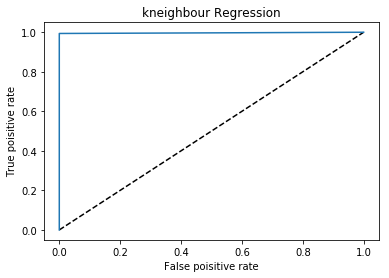

In [38]:

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='kneighbour Regression')
plt.xlabel('False poisitive rate')
plt.ylabel('True poisitive rate')
plt.title('kneighbour Regression')
plt.show()

In [41]:
kncpred

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,